In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dados = pd.read_csv('winequality-red.csv', sep = ';')

In [21]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
# desvio padrão de 'fixed acid'
# Qual é a mediana para a variável "residual sugar"?
dados.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [23]:
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
# No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
dados.shape

(1599, 12)

In [25]:
# quantos dados diferentes existem no dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
# Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?
((dados['residual sugar'].isnull())/len(dados['residual sugar'])).value_counts()

0.0    1599
Name: residual sugar, dtype: int64

In [27]:
dados['residual sugar'].isnull().value_counts()

False    1599
Name: residual sugar, dtype: int64

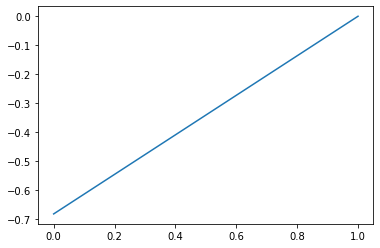

In [28]:
#correlacao entre 'fixed acid' e 'ph'
from scipy import stats
import matplotlib.pyplot as plt
corr = stats.pearsonr(dados['fixed acidity'], dados['pH'])

plt.plot(corr)

In [29]:
# Quantas instâncias existem para a qualidade do vinho igual a 5?
dados['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
# Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":
from scipy import stats
correlacao = stats.pearsonr(dados['quality'], dados['alcohol'])

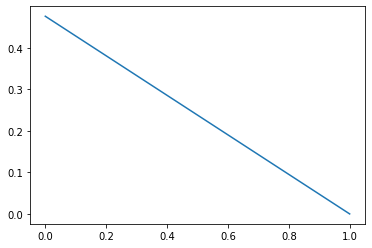

In [31]:
import matplotlib.pyplot as plt

plt.plot(correlacao)

In [0]:
#divisão de variaveis de entrada e de saída
y = dados['quality']
X = pd.DataFrame(columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'], data = dados)

In [33]:
X.shape

(1599, 11)

In [34]:
# Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada.
from sklearn.preprocessing import MinMaxScaler

X_minmax = X.copy()
X_minmax = MinMaxScaler().fit_transform(X)


array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [16]:
# Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size = 0.30, random_state=1)

clf_KNN = KNeighborsClassifier(n_neighbors = 5)
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
y_predKNN = clf_KNN.predict(X_test)
from sklearn.metrics import accuracy_score

acuraciaKNN = accuracy_score(y_test, y_predKNN)
print("O valor da acuracia do modelo KNN é: ", acuraciaKNN)

O valor da acuracia do modelo KNN é:  0.5645833333333333


In [18]:
# Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_predarvore = clf_arvore.predict(X_test)

acuraciaArvore = accuracy_score(y_test,y_predarvore)
print("O valor da acuracia do modelo Arvore de Decisão: ", acuraciaArvore)

O valor da acuracia do modelo Arvore de Decisão:  0.6125


In [20]:
# Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?
from sklearn.svm import SVC

clf_svm = SVC(gamma = 'auto', kernel = 'rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_predSVM = clf_svm.predict(X_test)

acuraciaSVM = accuracy_score(y_test, y_predSVM)
print("O valor da acuracia do modelo SVC: ", acuraciaSVM)

O valor da acuracia do modelo SVC:  0.5854166666666667


In [22]:
# Aplicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(alpha = 1e-5, hidden_layer_sizes =(5,5), random_state = 1)
clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
y_predmlp = clf_mlp.predict(X_test)

acuraciaMLP = accuracy_score(y_test, y_predmlp)
print("O valor da acuracia do modelo MLP: ", acuraciaMLP)

O valor da acuracia do modelo MLP:  0.6


In [25]:
# Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
pred_floresta=clf_floresta.predict(X_test)

acuracia_floresta = accuracy_score(y_test, pred_floresta)
print("O valor da acuracia do modelo Random Forest: ", acuracia_floresta)

O valor da acuracia do modelo Random Forest:  0.6791666666666667


In [0]:
# Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo data
y.replace(to_replace=[6,7,8], value= "Bom", inplace= True)
y.replace(to_replace=[5,4,3], value= "Ruim", inplace= True)
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_minmax, y, test_size = 0.30, random_state=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [29]:
y_predfloresta = clf_floresta.predict(X_test1)

acuraciaFloresta = accuracy_score(y_test1, y_predfloresta)
print("O valor da acuracia do modelo MLP: ", acuraciaFloresta)

O valor da acuracia do modelo MLP:  0.8041666666666667
